In [4]:
# importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# loading data
data = pd.read_csv(r'/content/drive/MyDrive/Documents/Machine Learning/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# checking number of unique values per column
for col in data:
  print(f'{col} : {data[col].nunique()}')

customerID : 7043
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


CustomerID column has no predictive power. It should be dropped.

In [8]:
df = data.drop(columns = 'customerID')

In [9]:
# checking data types
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.loc[df['TotalCharges'] != ' ']['TotalCharges'].astype('float').describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

The Total Charges column is type object and it has to be changed to float. It appears that there were some blank values, that have to be properly dealt with.


In [11]:
no_chrg_df = df.loc[df['TotalCharges'] == ' ']
print(f"{len(no_chrg_df)} out of {len(df)} records had a blank Total Charge")

11 out of 7043 records had a blank Total Charge


In [12]:
# exclude the 11 rows and convert to float data type
df1 = df.loc[df['TotalCharges'] != ' ']

df1['TotalCharges'] = df1['TotalCharges'].astype('float')

<ipython-input-12-d48ab3a6095b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalCharges'] = df1['TotalCharges'].astype('float')


# Data Visualizations

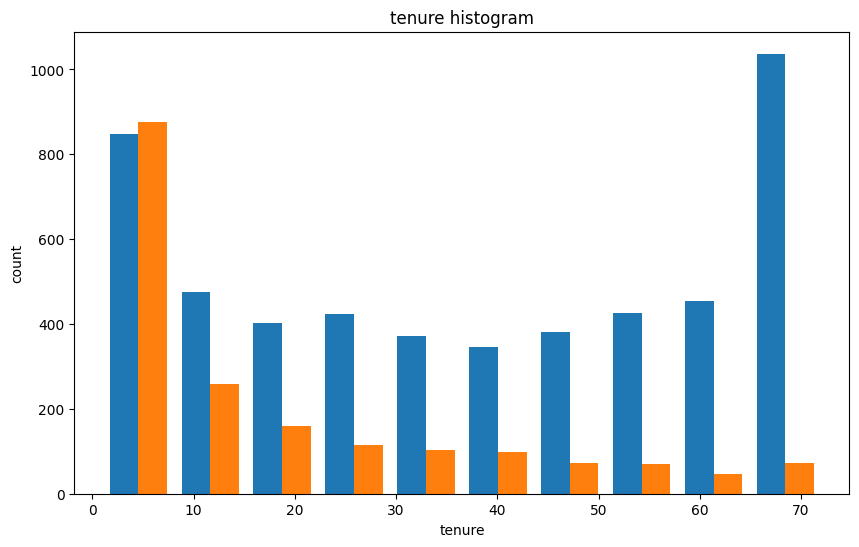

In [13]:
no_churn = df1[df1['Churn'] == 'No'].tenure
yes_churn = df1[df1['Churn'] == 'Yes'].tenure

plt.figure(figsize = (10, 6))
plt.hist([no_churn, yes_churn])
plt.title('tenure histogram')
plt.xlabel('tenure')
plt.ylabel('count')
plt.show()

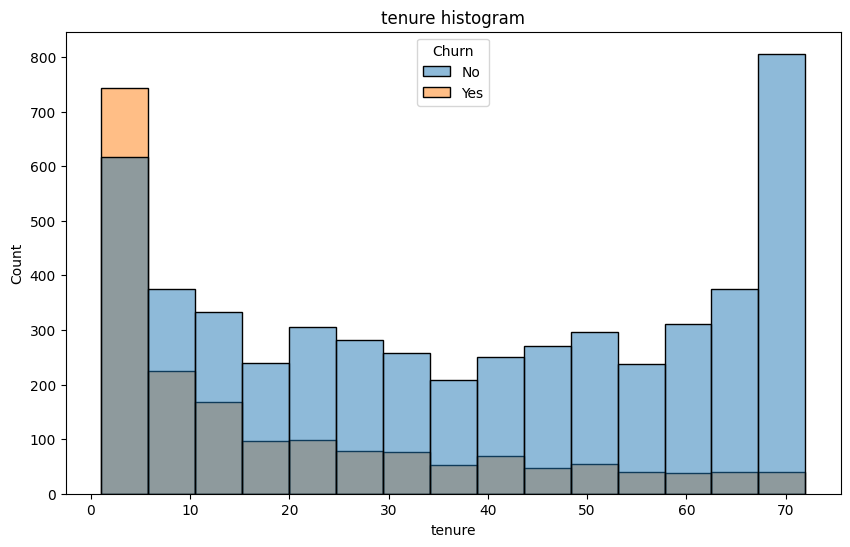

<Figure size 1000x700 with 0 Axes>

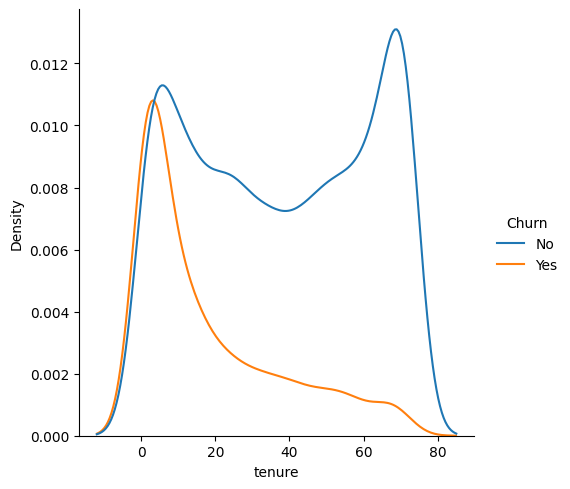

In [14]:
plt.figure(figsize = (10, 6))
plt.title('tenure histogram')
sns.histplot(data = df1, x = 'tenure', hue= 'Churn')
plt.show()

# distribution plot
plt.figure(figsize = (10, 7))
sns.displot(data = df1, x = 'tenure', hue = 'Churn', kind = 'kde')
plt.show()

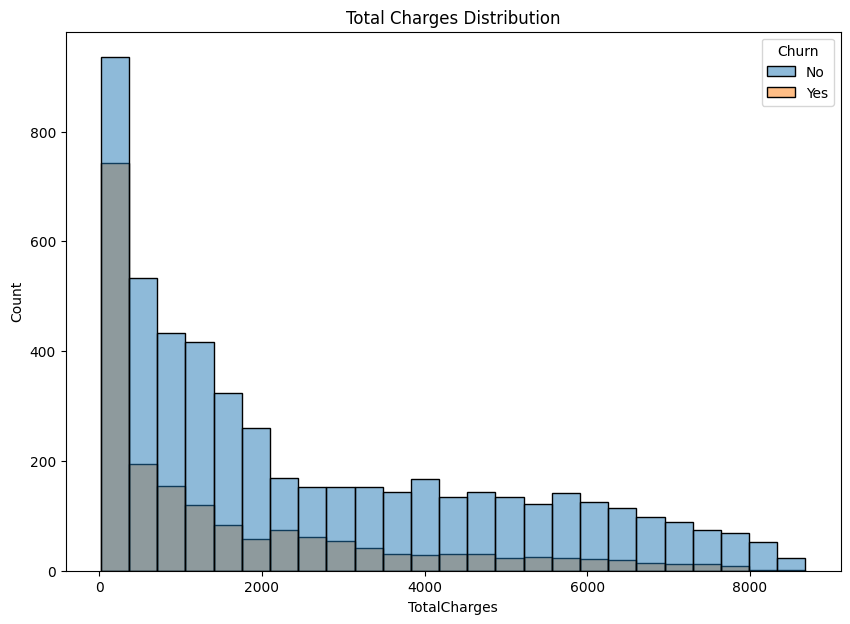

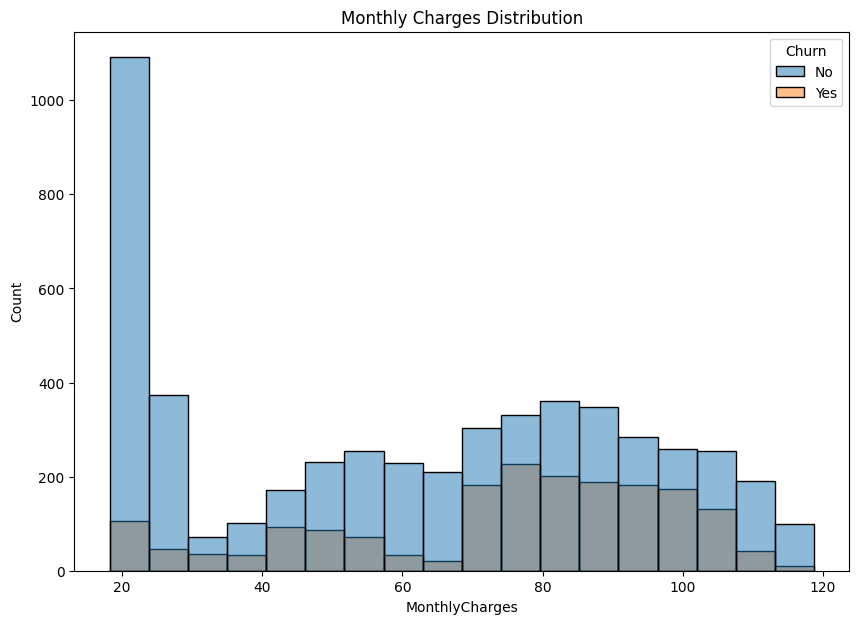

In [15]:
# Total Charges distribution plot
plt.figure(figsize = (10, 7))
sns.histplot(data = df1, x = 'TotalCharges', hue = 'Churn')
plt.title('Total Charges Distribution')
plt.show()

# Total Charges distribution plot
plt.figure(figsize = (10, 7))
sns.histplot(data = df1, x = 'MonthlyCharges', hue = 'Churn')
plt.title('Monthly Charges Distribution')
plt.show()



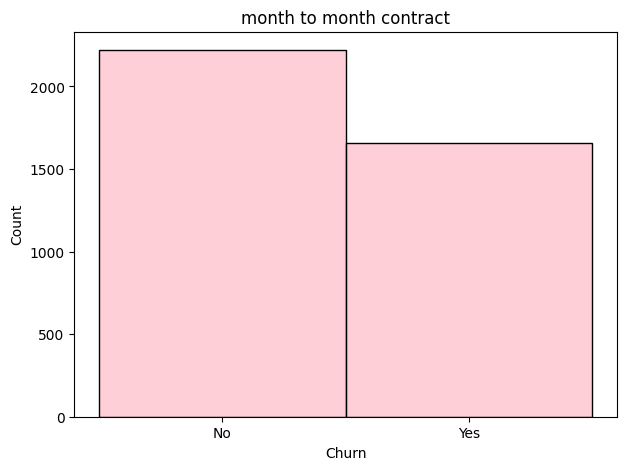

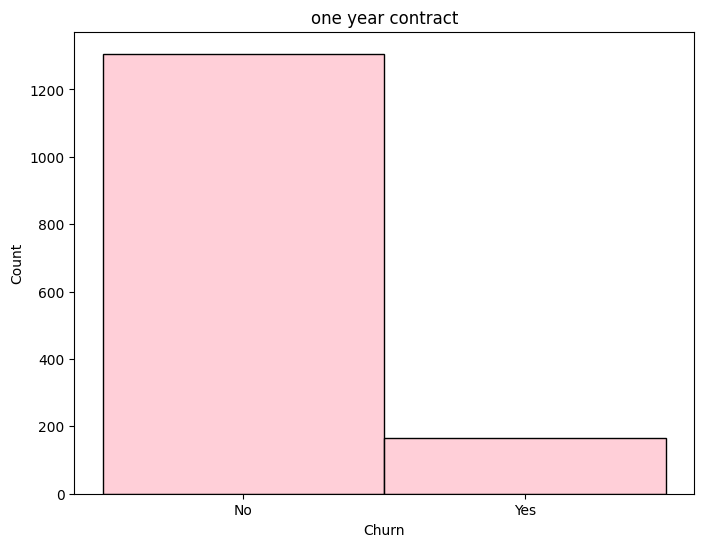

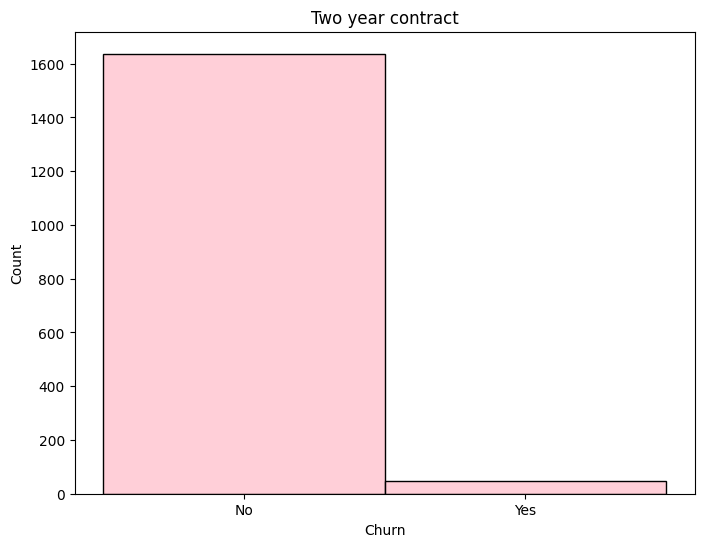

In [16]:
# Let's check churn by Contract

monthly_contr = df1[df1.Contract == 'Month-to-month']
oneyr_contr = df1[df1.Contract == 'One year']
twoyr_contr = df1[df1.Contract == 'Two year']

plt.figure(figsize = (7, 5))
plt.title('month to month contract')
sns.histplot(data = monthly_contr, x = 'Churn', color = 'pink')
plt.show()

plt.figure(figsize = (8, 6))
plt.title('one year contract')
sns.histplot(data = oneyr_contr, x = 'Churn', color = 'pink')
plt.show()

plt.figure(figsize = (8, 6))
plt.title('Two year contract')
sns.histplot(data = twoyr_contr, x = 'Churn', color = 'pink')
plt.show()

Data Pre-Processing

In [17]:
# columns with data type as object
df1.dtypes[df1.dtypes == 'object'].index

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [18]:
# check unique values in each of the object data type columns

for col in df1.dtypes[df1.dtypes == 'object'].index:
  print(f'{col}   {df1[col].unique()}')

gender   ['Female' 'Male']
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
PhoneService   ['No' 'Yes']
MultipleLines   ['No phone service' 'No' 'Yes']
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   ['No' 'Yes' 'No internet service']
OnlineBackup   ['Yes' 'No' 'No internet service']
DeviceProtection   ['No' 'Yes' 'No internet service']
TechSupport   ['No' 'Yes' 'No internet service']
StreamingTV   ['No' 'Yes' 'No internet service']
StreamingMovies   ['No' 'Yes' 'No internet service']
Contract   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn   ['No' 'Yes']


In [19]:
# Encoding our categorical columns
df2 = pd.get_dummies(data = df1, columns= ['InternetService', 'MultipleLines',
                                           'OnlineSecurity', 'OnlineBackup',
                                           'DeviceProtection', 'TechSupport',
                                           'StreamingTV', 'StreamingMovies',
                                           'PaymentMethod', 'gender'])
df3 = df2.replace({'Yes': 1,
                   'No': 0,
                   'Month-to-month': 0,
                   'One year': 1,
                   'Two year': 2})
df3.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male
0,0,1,0,1,0,0,1,29.85,29.85,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,34,1,1,0,56.95,1889.50,0,...,0,1,0,0,0,0,0,1,0,1
2,0,0,0,2,1,0,1,53.85,108.15,1,...,0,1,0,0,0,0,0,1,0,1
3,0,0,0,45,0,1,0,42.30,1840.75,0,...,0,1,0,0,1,0,0,0,0,1
4,0,0,0,2,1,0,1,70.70,151.65,1,...,0,1,0,0,0,0,1,0,1,0


In [20]:
df3.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
Contract                                     int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                

In [21]:
df1['Churn'].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [22]:
df3['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

One thing we must check is whether our dataset is balanced. imbalanced datasets can lead to biased model performance and affect the accuracy of our predictions.

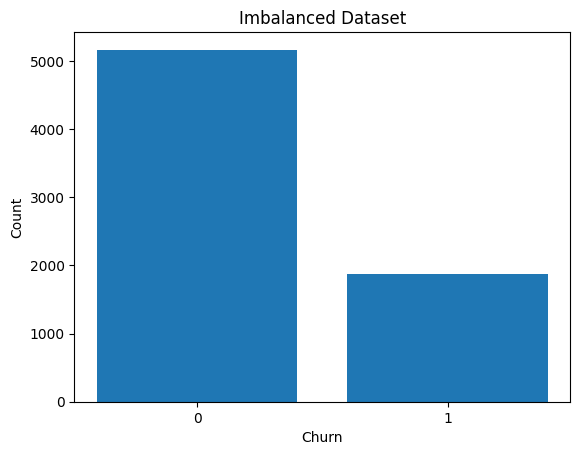

In [23]:
# check whether the data is balanced

plot_df = df3['Churn'].value_counts().reset_index()

plt.bar(plot_df['index'].astype('str'), plot_df['Churn'])
plt.title('Imbalanced Dataset')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

# split the target variable and the input variables
X = df3.drop(columns = 'Churn')
y = df3['Churn']


# scaling data
scaler = MinMaxScaler()
scaler.fit(X[['MonthlyCharges', 'TotalCharges']])
X[['MonthlyCharges', 'TotalCharges']] = scaler.transform(X[['MonthlyCharges', 'TotalCharges']])

In [25]:
X[['MonthlyCharges', 'TotalCharges']].tail()            # The features are properly scaled

,MonthlyCharges,TotalCharges
7038,0.662189,0.227521
7039,0.845274,0.847461
7040,0.112935,0.037809
7041,0.558706,0.033210
7042,0.869652,0.787641


In [26]:
X.dtypes                # All categorical columns have been encoded

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
Contract                                     int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_No                              uint8
OnlineBackup_No internet servic

In [27]:
# Solve the imbalance
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state= 4)

smote = SMOTE()

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

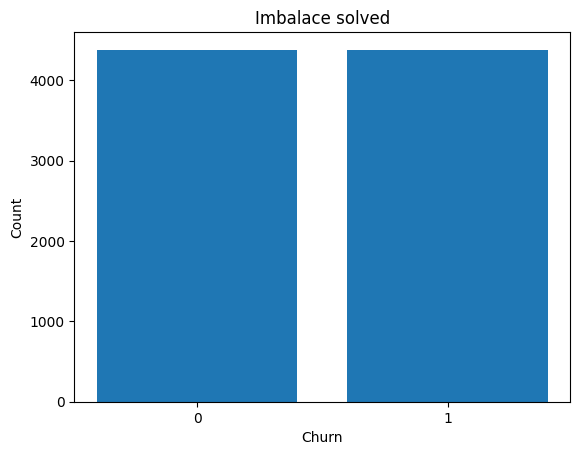

In [28]:
plot_df2 = y_train_resampled.value_counts().reset_index()


plt.bar(plot_df2['index'].astype('str'), plot_df2['Churn'])
plt.title('Imbalace solved')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

**Model Building**

In [29]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import metrics

In [30]:
# Constructing Artificial Neural Network model architecture

model = keras.Sequential([
    keras.layers.Dense(600, input_shape = (39,), activation = 'relu'),
    keras.layers.Dense(320, activation = 'relu'),
    keras.layers.Dense(190, activation=keras.layers.LeakyReLU(alpha=0.16)),
    keras.layers.Dense(190, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# compile model
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics= ['accuracy', metrics.Precision()])

In [31]:
#  Train model
model.fit(X_train_resampled, y_train_resampled, epochs = 100, validation_split = 0.15)

Epoch 1/100
233/233 [==============================] - 7s 6ms/step - loss: 0.5846 - accuracy: 0.7149 - precision: 0.6887 - val_loss: 1.0284 - val_accuracy: 0.5266 - val_precision: 1.0000
Epoch 2/100
233/233 [==============================] - 1s 5ms/step - loss: 0.5415 - accuracy: 0.7455 - precision: 0.6899 - val_loss: 0.7128 - val_accuracy: 0.6362 - val_precision: 1.0000
Epoch 3/100
233/233 [==============================] - 1s 5ms/step - loss: 0.5223 - accuracy: 0.7549 - precision: 0.7093 - val_loss: 1.0734 - val_accuracy: 0.5061 - val_precision: 1.0000
Epoch 4/100
233/233 [==============================] - 2s 8ms/step - loss: 0.5041 - accuracy: 0.7580 - precision: 0.7228 - val_loss: 0.2859 - val_accuracy: 0.9384 - val_precision: 1.0000
Epoch 5/100
233/233 [==============================] - 2s 8ms/step - loss: 0.4890 - accuracy: 0.7662 - precision: 0.7382 - val_loss: 0.3643 - val_accuracy: 0.9300 - val_precision: 1.0000
Epoch 6/100
233/233 [==============================] - 1s 6ms/ste

In [32]:
# make predictions
dl_predictions = model.predict(X_test)
dl_predictions

33/33 [==============================] - 0s 3ms/step


array([[0.25329667],
       [0.17583841],
       [0.07357672],
       ...,
       [0.3885967 ],
       [0.37918252],
       [0.01549548]], dtype=float32)

In [33]:
# converting values to Binary digits
def convert_to_binary(predictions, threshold= 0.5):
    binary_predictions = np.where(predictions > threshold, 1, 0)
    return binary_predictions

binary_predictions = convert_to_binary(dl_predictions)
binary_predictions


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, binary_predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       783
           1       0.60      0.59      0.59       272

    accuracy                           0.79      1055
   macro avg       0.73      0.73      0.73      1055
weighted avg       0.79      0.79      0.79      1055



# Trying other models

I will compare performance of different models to Neural Networks

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [45]:
log_reg = LogisticRegression(random_state = 43)
rfc = RandomForestClassifier(random_state = 43)
gbc = GradientBoostingClassifier(random_state = 43)
svm = SVC(kernel = 'rbf', random_state = 43)
xgb = XGBClassifier(random_state = 43)


#                   XGBoost Classifier
xgb.fit(X_train_resampled, y_train_resampled)
xgb_pred = xgb.predict(X_test)

#            evaluation

print(f"XGBoost Classifier \n{classification_report(y_test, xgb_pred)}")


#                   LOGISTIC REGRESSION
log_reg.fit(X_train_resampled, y_train_resampled)
log_predictions = log_reg.predict(X_test)

#            evaluation

print(f"Logistic Regression\n {classification_report(y_test, log_predictions)}")



#                   RANDOM FOREST CLASSIFIER
rfc.fit(X_train_resampled, y_train_resampled)
rfc_predictions = rfc.predict(X_test)

#            evaluation
print(f"Random Forest Classifier\n {classification_report(y_test, rfc_predictions)}")


#                   GRADIENT BOOSTING
gbc.fit(X_train_resampled, y_train_resampled)
gbc_predictions = gbc.predict(X_test)

#            evaluation

print(f"Gradient Boosting \n{classification_report(y_test, gbc_predictions)}")



#                   SVM
svm.fit(X_train_resampled, y_train_resampled)
svm_predictions = svm.predict(X_test)

#            evaluation
print(f"Support Vector Machines \n{classification_report(y_test, svm_predictions)})")

XGBoost Classifier 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       783
           1       0.58      0.53      0.55       272

    accuracy                           0.78      1055
   macro avg       0.71      0.70      0.70      1055
weighted avg       0.77      0.78      0.78      1055



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       783
           1       0.59      0.66      0.62       272

    accuracy                           0.79      1055
   macro avg       0.73      0.75      0.74      1055
weighted avg       0.80      0.79      0.80      1055

Random Forest Classifier
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       783
           1       0.60      0.54      0.57       272

    accuracy                           0.79      1055
   macro avg       0.73      0.71      0.72      1055
weighted avg       0.78      0.79      0.79      1055

Gradient Boosting 
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       783
           1       0.56      0.68      0.61       272

    accuracy                           0.78      1055
   macro avg       0.72      0.75      0.73      1055
weighted

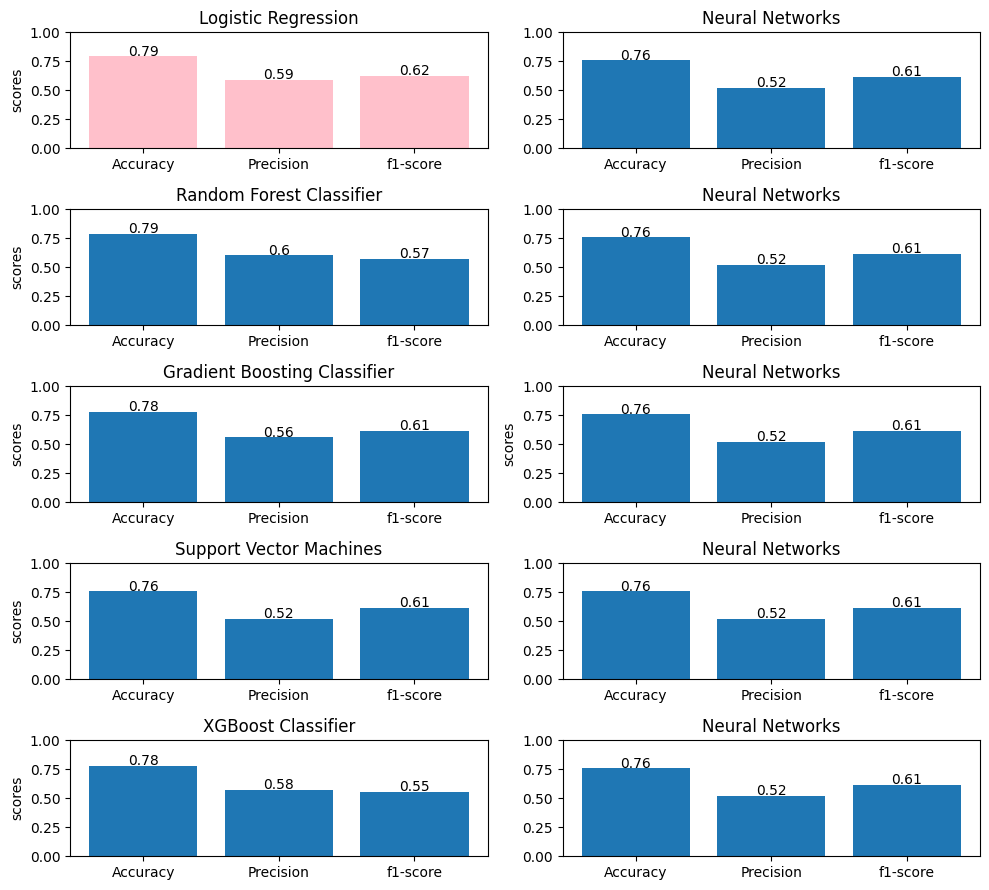

In [46]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# scores for XGBoost Classifier
xgb_acc_score = accuracy_score(y_test, xgb_pred)
xgb_prec_score = precision_score(y_test, xgb_pred)
xgb_f1_score = f1_score(y_test, xgb_pred)


# scores for logistic regression
log_acc_score = accuracy_score(y_test, log_predictions)
log_prec_score = precision_score(y_test, log_predictions)
log_f1_score = f1_score(y_test, log_predictions)

# scores for random forest classifier
rfc_acc_score = accuracy_score(y_test, rfc_predictions)
rfc_prec_score = precision_score(y_test, rfc_predictions)
rfc_f1_score = f1_score(y_test, rfc_predictions)

# scores for gradient boosting classifier
gbc_acc_score = accuracy_score(y_test, gbc_predictions)
gbc_prec_score = precision_score(y_test, gbc_predictions)
gbc_f1_score = f1_score(y_test, gbc_predictions)

# scores for support vector machines
svm_acc_score = accuracy_score(y_test, svm_predictions)
svm_prec_score = precision_score(y_test, svm_predictions)
svm_f1_score = f1_score(y_test, svm_predictions)

# scores for artificial neural network
dl_acc_score = accuracy_score(y_test, svm_predictions)
dl_prec_score = precision_score(y_test, svm_predictions)
dl_f1_score = f1_score(y_test, svm_predictions)



#  prepare for plots

xgb_metrics = ['Accuracy', 'Precision', 'f1-score']
xgb_scores = [xgb_acc_score, xgb_prec_score, xgb_f1_score]


logistic_regression_metrics = ['Accuracy', 'Precision', 'f1-score']
logistic_regression_scores = [log_acc_score, log_prec_score, log_f1_score]

rfc_metrics = ['Accuracy', 'Precision', 'f1-score']
rfc_scores = [rfc_acc_score, rfc_prec_score, rfc_f1_score]

gbc_metrics = ['Accuracy', 'Precision', 'f1-score']
gbc_scores = [gbc_acc_score, gbc_prec_score, gbc_f1_score]

svm_metrics = ['Accuracy', 'Precision', 'f1-score']
svm_scores = [svm_acc_score, svm_prec_score, svm_f1_score]

dl_metrics = ['Accuracy', 'Precision', 'f1-score']
dl_scores = [dl_acc_score, dl_prec_score, dl_f1_score]


# plotting the scores vs Neural Network
def plot_texts(scores):
    for index, score in enumerate(scores):
        plt.text(x=index, y= score+0.004, s=str(round(score,1)), ha='center')


fig, ax = plt.subplots(5, 2, figsize = (10, 9))

ax[0, 0].bar(logistic_regression_metrics, logistic_regression_scores, color = 'Pink')
ax[0, 0].set_ylim(0, 1)
ax[0, 0].set_title('Logistic Regression')
ax[0, 0].set_ylabel('scores')
ax[0, 1].bar(dl_metrics, dl_scores)
ax[0, 1].set_ylim(0, 1)
ax[0, 1].set_title('Neural Networks')
for index, score in enumerate(logistic_regression_scores):
    ax[0, 0].text(x=index, y= score+0.006, s=str(round(score,2)), ha='center')
for index, score in enumerate(dl_scores):
    ax[0, 1].text(x=index, y= score+0.006, s=str(round(score,2)), ha='center')


ax[1, 0].bar(rfc_metrics, rfc_scores)
ax[1, 0].set_ylim(0, 1)
ax[1, 0].set_title('Random Forest Classifier')
ax[1, 0].set_ylabel('scores')
ax[1, 1].bar(dl_metrics, dl_scores)
ax[1, 1].set_ylim(0, 1)
ax[1, 1].set_title('Neural Networks')
for index, score in enumerate(rfc_scores):
    ax[1, 0].text(x=index, y= score+0.006, s=str(round(score,2)), ha='center')
for index, score in enumerate(dl_scores):
    ax[1, 1].text(x=index, y= score+0.006, s=str(round(score,2)), ha='center')


ax[2, 0].bar(gbc_metrics, gbc_scores)
ax[2, 0].set_ylim(0, 1)
ax[2, 0].set_ylabel('scores')
ax[2, 0].set_title('Gradient Boosting Classifier')
ax[2, 1].bar(dl_metrics, dl_scores)
ax[2, 1].set_ylim(0, 1)
ax[2, 1].set_ylabel('scores')
ax[2, 1].set_title('Neural Networks')
for index, score in enumerate(gbc_scores):
    ax[2, 0].text(x=index, y= score+0.006, s=str(round(score,2)), ha='center')
for index, score in enumerate(dl_scores):
    ax[2, 1].text(x=index, y= score+0.006, s=str(round(score,2)), ha='center')


ax[3, 0].bar(svm_metrics, svm_scores)
ax[3, 0].set_ylabel('scores')
ax[3, 0].set_ylim(0, 1)
ax[3, 0].set_title('Support Vector Machines')
ax[3, 1].bar(dl_metrics, dl_scores)
ax[3, 1].set_ylim(0, 1)
ax[3, 1].set_title('Neural Networks')
for index, score in enumerate(svm_scores):
    ax[3, 0].text(x=index, y= score+0.006, s=str(round(score,2)), ha='center')
for index, score in enumerate(dl_scores):
    ax[3, 1].text(x=index, y= score+0.006, s=str(round(score,2)), ha='center')


ax[4, 0].bar(xgb_metrics, xgb_scores)
ax[4, 0].set_ylabel('scores')
ax[4, 0].set_ylim(0, 1)
ax[4, 0].set_title('XGBoost Classifier')
ax[4, 1].bar(dl_metrics, dl_scores)
ax[4, 1].set_ylim(0, 1)
ax[4, 1].set_title('Neural Networks')
for index, score in enumerate(xgb_scores):
    ax[4, 0].text(x=index, y= score+0.006, s=str(round(score,2)), ha='center')
for index, score in enumerate(dl_scores):
    ax[4, 1].text(x=index, y= score+0.006, s=str(round(score,2)), ha='center')

plt.tight_layout()
plt.show()


For this problem, Logistic Regression and the Gradient Boosting Classifier seem to slightly outperform the others.

# Hyperparameter Tuning - Random Forest Regressor

In [ ]:
!pip install optuna

In [48]:
import optuna
from sklearn.model_selection import cross_val_score

# Random Forest Classifier

# Define the objective function to be optimized by Optuna
def objective(trial):
    # Define hyperparameters to be optimized
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)

    # Fit a model using the current hyperparameters
    model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, random_state = 43)
    model.fit(X_train_resampled, y_train_resampled)

    # Evaluate the model on the test set
    score = cross_val_score(model, X_test, y_test, cv = 5).mean()

    # Return the score as the objective value to be minimized by Optuna
    return score

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Train the final model using the best hyperparameters found by Optuna on the entire training set
best_params = study.best_params
best_score = study.best_value

print(f"Best parameters", best_params)
print(f"Best score is ", best_score)

final_model = RandomForestClassifier(max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'], min_samples_split=best_params['min_samples_split'], random_state = 43)
final_model.fit(X_train_resampled, y_train_resampled)

# Evaluate the final model on the holdout test set
test_score = final_model.score(X_test, y_test)

[I 2024-03-01 12:55:59,660] A new study created in memory with name: no-name-22882e66-3581-4843-8622-085d92b9259b
[I 2024-03-01 12:56:05,010] Trial 0 finished with value: 0.7421800947867299 and parameters: {'max_depth': 12, 'n_estimators': 600, 'min_samples_split': 0.711296768175447, 'min_samples_leaf': 0.16125066956047596}. Best is trial 0 with value: 0.7421800947867299.
[I 2024-03-01 12:56:09,057] Trial 1 finished with value: 0.7421800947867299 and parameters: {'max_depth': 4, 'n_estimators': 400, 'min_samples_split': 0.3849577076185441, 'min_samples_leaf': 0.33698754571266304}. Best is trial 0 with value: 0.7421800947867299.
[I 2024-03-01 12:56:17,551] Trial 2 finished with value: 0.7421800947867299 and parameters: {'max_depth': 19, 'n_estimators': 900, 'min_samples_split': 0.4318692641547157, 'min_samples_leaf': 0.43572966236429245}. Best is trial 0 with value: 0.7421800947867299.
[I 2024-03-01 12:56:24,787] Trial 3 finished with value: 0.7421800947867299 and parameters: {'max_dept

Best parameters {'max_depth': 12, 'n_estimators': 600, 'min_samples_split': 0.711296768175447, 'min_samples_leaf': 0.16125066956047596}
Best score is  0.7421800947867299


In [51]:
print(round(test_score, 2))

0.74


Optuna hyperparameter tuning seems to be counter efficient.